In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [3]:
clean_tweet_df = pd.read_csv('./data/clean_tweet.csv')

In [4]:
clean_tweet_df.head(5)

,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_count,followers_count,friends_count,possibly_sensitive,user_mentions,place,place_coord_boundaries
0,0,2021-06-18 17:55:49,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...","🚨Africa is ""in the midst of a full-blown third...","Sentiment(polarity=0.16666666666666666, subjec...",0.166667,0.188889,en,548,612,ketuesriche,2,551,351,NaN,"['TelGlobalHealth', 'WHOAFRO']",Mass,NaN
1,1,2021-06-18 17:55:59,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...","Dr Moeti is head of WHO in Africa, and one of ...","Sentiment(polarity=0.13333333333333333, subjec...",0.133333,0.455556,en,195,92,Grid1949,1,66,92,NaN,['globalhlthtwit'],"Edinburgh, Scotland",NaN
2,2,2021-06-18 17:56:07,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,Thank you esearch2note for creating this amazi...,"Sentiment(polarity=0.3166666666666667, subject...",0.316667,0.483333,en,2,1,LeeTomlinson8,3,1195,1176,NaN,"['NHSRDForum', 'Research2note', 'NHSRDForum']",NaN,NaN
3,3,2021-06-18 17:56:10,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...","Former Pfizer VP and Virologist, Dr. Michael Y...","Sentiment(polarity=0.08611111111111111, subjec...",0.086111,0.197222,en,1580,899,RIPNY08,1,2666,2704,NaN,['HighWireTalk'],NaN,NaN
4,4,2021-06-18 17:56:20,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,I think it’s important that we don’t sell COVA...,"Sentiment(polarity=0.27999999999999997, subjec...",0.280000,0.620000,en,72,20,pash22,1,28250,30819,NaN,['PeterHotez'],United Kingdom,NaN


In [5]:
print("The number of missing value(s): {}".format(clean_tweet_df.isnull().sum().sum()))
print("Columns having rows with null values:{}".format(clean_tweet_df.columns[clean_tweet_df.isnull().any()]))

The number of missing value(s): 13990
Columns having rows with null values:Index(['possibly_sensitive', 'place', 'place_coord_boundaries'], dtype='object')


In [6]:
#text preprocessing
English_tweets = clean_tweet_df.loc[clean_tweet_df['lang'] =="en"]
English_tweets['clean_text']= English_tweets['clean_text'].astype(str)
English_tweets['clean_text'] = English_tweets['clean_text'].apply(lambda x: x.lower())
English_tweets['clean_text']= English_tweets['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

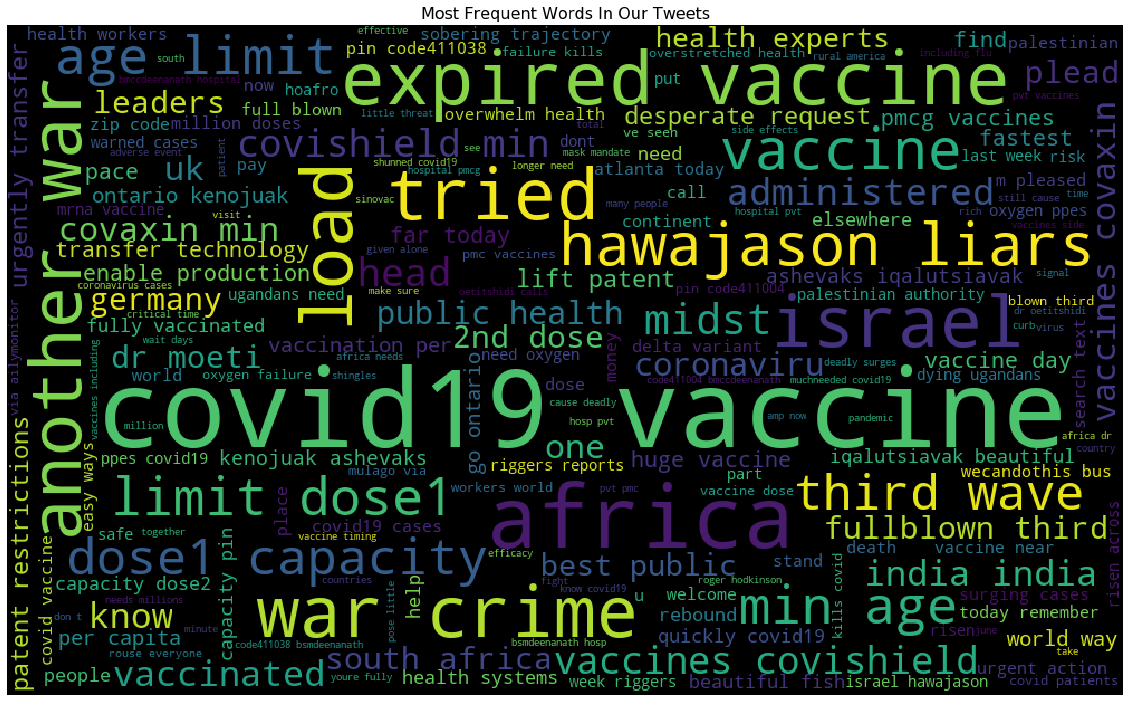

In [7]:
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(English_tweets.clean_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

In [8]:
#Converting tweets to list of words For feature engineering
sentence_list = [tweet for tweet in English_tweets['clean_text']]
word_list = [sent.split() for sent in sentence_list]

In [9]:
#Create dictionary which contains Id and word 
word_to_id = corpora.Dictionary(word_list)
for k, v in word_to_id.items():
    #print(k,"........",v)

0 ........ 15
1 ........ 20
2 ........ a
3 ........ across
4 ........ also
5 ........ and
6 ........ by
7 ........ cases
8 ........ continent
9 ........ coronavirus
10 ........ deaths
11 ........ fullblown
12 ........ has
13 ........ have
14 ........ head
15 ........ hoafro
16 ........ in
17 ........ is
18 ........ last
19 ........ midst
20 ........ more
21 ........ of
22 ........ reports
23 ........ riggers
24 ........ risen
25 ........ than
26 ........ the
27 ........ third
28 ........ warned
29 ........ wave
30 ........ week
31 ........ 🚨africa
32 ........ 🧵
33 ........ africa
34 ........ best
35 ........ desperate
36 ........ dr
37 ........ enable
38 ........ experts
39 ........ for
40 ........ germany
41 ........ health
42 ........ hers
43 ........ i
44 ........ know
45 ........ leaders
46 ........ lift
47 ........ moeti
48 ........ one
49 ........ patent
50 ........ plead
51 ........ production
52 ........ public
53 ........ request
54 ........ restrictions
55 ........ technology

769 ........ covidvaccine
770 ........ deliveries
771 ........ fined
772 ........ ftselisted
773 ........ gt
774 ........ lost
775 ........ pharma
776 ........ supplies
777 ........ supply
778 ........ victory
779 ........ ailysabah
780 ........ lend
781 ........ palestine
782 ........ soontoexpire
783 ........ 12237…
784 ........ 1845
785 ........ age
786 ........ bsmdeenanath
787 ........ capacity
788 ........ code411038
789 ........ covishield
790 ........ dose1
791 ........ hosp
792 ........ limit
793 ........ min
794 ........ pin
795 ........ pmc
796 ........ pvt
797 ........ 67330…
798 ........ bmccdeenanath
799 ........ code411004
800 ........ hospital
801 ........ 18
802 ........ 24
803 ........ capaci…
804 ........ code411030
805 ........ dose2
806 ........ p
807 ........ poona
808 ........ 0
809 ........ aundh
810 ........ capa…
811 ........ code411027
812 ........ agreement
813 ........ minister
814 ........ naftalibennett
815 ........ newly
816 ........ per
817 ........ pri

1309 ........ mnangagwa
1310 ........ paltry
1311 ........ ran
1312 ........ rolling
1313 ........ sarcastic
1314 ........ telling
1315 ........ varakashi
1316 ........ video
1317 ........ zimbabwe
1318 ........ cancelling
1319 ........ date
1320 ........ expiry
1321 ........ shoul…
1322 ........ issue
1323 ........ possible
1324 ........ potential
1325 ........ records
1326 ........ signal
1327 ........ system
1328 ........ vaers
1329 ........ uganda
1330 ........ code411046
1331 ........ hajrat
1332 ........ pmcg
1333 ........ santoshnagar
1334 ........ yunus
1335 ........ am
1336 ........ applicable
1337 ........ broadly
1338 ........ equitably
1339 ........ india’s
1340 ........ learned
1341 ........ ndiacovidsos
1342 ........ ravaging
1343 ........ saw
1344 ........ sense
1345 ........ struggling
1346 ........ unfolding
1347 ........ until
1348 ........ 61730…
1349 ........ 11731…
1350 ........ code412115
1351 ........ symbiosis
1352 ........ university
1353 ........ effectively
1

1975 ........ evidencebased
1976 ........ guidance
1977 ........ however…
1978 ........ interested
1979 ........ position
1980 ........ regarding
1981 ........ technically
1982 ........ think…
1983 ........ ef…
1984 ........ ormanjam671
1985 ........ oryfibs
1986 ........ tewartjenning9
1987 ........ contributes
1988 ........ disclosu…
1989 ........ discussions
1990 ........ halifax
1991 ........ mcissac
1992 ........ office
1993 ........ status
1994 ........ commissioner
1995 ........ difficult
1996 ........ happening
1997 ........ knew
1998 ........ no…
1999 ........ scale
2000 ........ app👉
2001 ........ aware
2002 ........ beprepared
2003 ........ cold
2004 ........ extra
2005 ........ hayfever
2006 ........ link
2007 ........ staysafe
2008 ........ symptoms
2009 ........ tracker
2010 ........ again
2011 ........ b…
2012 ........ canada
2013 ........ meant
2014 ........ mostly
2015 ........ reopening
2016 ........ rushing
2017 ........ vaccinations
2018 ........ simple
2019 .......

2642 ........ representing…
2643 ........ coronavaccine
2644 ........ coronavirusupdate
2645 ........ covid19southafrica
2646 ........ level3
2647 ........ cure…
2648 ........ excuse
2649 ........ ignorance
2650 ........ misquoted
2651 ........ defend
2652 ........ taiwanese
2653 ........ u…
2654 ........ weapons
2655 ........ 88
2656 ........ contagious
2657 ........ hurt
2658 ........ career
2659 ........ dumb
2660 ........ foundations
2661 ........ georgesoros
2662 ........ gods
2663 ........ hundreds
2664 ........ ignominious
2665 ........ kill
2666 ........ sake
2667 ........ “reorganization”
2668 ........ agencies
2669 ........ compensate
2670 ........ sanction
2671 ........ 🇺🇳
2672 ........ 👇🏻
2673 ........ feeling
2674 ........ fortunate
2675 ........ grateful
2676 ........ g…
2677 ........ knowing
2678 ........ stay
2679 ........ 😷😷😷😷
2680 ........ aywamsted
2681 ........ place
2682 ........ putting
2683 ........ pu…
2684 ........ eaponizednews
2685 ........ dntirectr
2686 ...

3308 ........ ambassador
3309 ........ help…
3310 ........ pcoalition
3311 ........ rvgprabhakarus
3312 ........ affect
3313 ........ anjithramamd
3314 ........ iamiurology
3315 ........ male
3316 ........ malefertility
3317 ........ menshealthmonth
3318 ........ miamimedicine
3319 ........ urologist
3320 ........ urology
3321 ........ 205062
3322 ........ 84
3323 ........ harris
3324 ........ iii
3325 ........ involved
3326 ........ lake
3327 ........ lawren
3328 ........ superior
3329 ........ clinics
3330 ........ ducey
3331 ........ largely
3332 ........ okay
3333 ........ ougducey
3334 ........ praising
3335 ........ employees
3336 ........ federal
3337 ........ leave
3338 ........ owners
3339 ........ paid
3340 ........ provider
3341 ........ rsnews
3342 ........ small
3343 ........ tax
3344 ........ ▶️
3345 ........ getting…
3346 ........ resu…
3347 ........ coronavirusvaccination
3348 ........ coronavirus…
3349 ........ potentially
3350 ........ trump
3351 ........ donim
3352 .

3975 ........ advocate
3976 ........ equality
3977 ........ forum…
3978 ........ multilateral
3979 ........ methods
3980 ........ researched
3981 ........ used
3982 ........ 99
3983 ........ crafted
3984 ........ fabric
3985 ........ land
3986 ........ minds
3987 ........ surface
3988 ........ cara
3989 ........ irha
3990 ........ veale
3991 ........ ‘why’
3992 ........ ontarios
3993 ........ precautions
3994 ........ preferred
3995 ........ recall
3996 ........ recommend
3997 ........ vs
3998 ........ causes
3999 ........ recognize
4000 ........ cup
4001 ........ exbrit…
4002 ........ games
4003 ........ tips
4004 ........ 323
4005 ........ calculation
4006 ........ calculati…
4007 ........ faster
4008 ........ nurse
4009 ........ erosion
4010 ........ trust
4011 ........ 2019ncov
4012 ........ 😂😭
4013 ........ insanity
4014 ........ origin
4015 ........ ad1…
4016 ........ 29526…
4017 ........ forced
4018 ........ 1980
4019 ........ administrators
4020 ........ hughes
4021 ........ in

4641 ........ abt
4642 ........ jakarta
4643 ........ explain
4644 ........ recove…
4645 ........ 23826…
4646 ........ terrible
4647 ........ flue
4648 ........ normal
4649 ........ focus
4650 ........ i…
4651 ........ travels
4652 ........ trip
4653 ........ holds
4654 ........ ldcs
4655 ........ liquidity
4656 ........ majority
4657 ........ recover
4658 ........ sp…
4659 ........ burn
4660 ........ probably
4661 ........ places…
4662 ........ vaccinations…
4663 ........ cancels
4664 ........ badly
4665 ........ hmm
4666 ........ ‘safe’
4667 ........ 48
4668 ........ anywhere
4669 ........ ease11
4670 ........ radyklopfernba
4671 ........ rimesc30
4672 ........ uckallbagels
4673 ........ still…
4674 ........ grasping
4675 ........ hardest
4676 ........ skeptics
4677 ........ vaxx
4678 ........ 114
4679 ........ kynews
4680 ........ thepa
4681 ........ uardian
4682 ........ bs
4683 ........ else
4684 ........ libertarianism
4685 ........ philosophy
4686 ........ proves
4687 ........ s

5308 ........ 24710417…
5309 ........ agecko2
5310 ........ ainsidernow
5311 ........ effm1981
5312 ........ k…
5313 ........ rap
5314 ........ rookeddy
5315 ........ forms
5316 ........ fp
5317 ........ olrikr
5318 ........ resistant
5319 ........ responds
5320 ........ udatanewshub
5321 ........ ⚠️🌍💉😷
5322 ........ cruiselines
5323 ........ insist
5324 ........ ovrondesantis
5325 ........ refused…
5326 ........ …you
5327 ........ answ…
5328 ........ cops
5329 ........ goals
5330 ........ leaving
5331 ........ police
5332 ........ b1612
5333 ........ hand
5334 ........ loosen
5335 ........ practices
5336 ........ reemerge
5337 ........ sanitizing
5338 ........ slowed
5339 ........ updating
5340 ........ andrewclyde
5341 ........ defun…
5342 ........ elisestefanik
5343 ........ firejimjordan
5344 ........ kevinmccarthy
5345 ........ marcorubio
5346 ........ mitchmcconnell
5347 ........ paulgosar
5348 ........ rondesantis
5349 ........ numbers
5350 ........ opposi…
5351 ........ regina


6141 ........ econ
6142 ........ honoured
6143 ........ necampaign
6144 ........ oneworld
6145 ........ passthemic
6146 ........ she’s
6147 ........ 12425…
6148 ........ 8640…
6149 ........ awesome
6150 ........ ooyakazemi1983
6151 ........ afba
6152 ........ capeverdes
6153 ........ countryrisk
6154 ........ cva
6155 ........ ecowas
6156 ........ eroded
6157 ........ imf
6158 ........ interpol
6159 ........ judicial
6160 ........ moibrahim
6161 ........ mpd
6162 ........ occrp
6163 ........ pnildc
6164 ........ praia
6165 ........ sal
6166 ........ sonangol
6167 ........ ticv
6168 ........ unodc
6169 ........ covid19conversations
6170 ........ 10thousand
6171 ........ hiv
6172 ........ tb
6173 ........ their…
6174 ........ thousand
6175 ........ dear
6176 ........ lotus
6177 ........ madam
6178 ........ philippines
6179 ........ sir
6180 ........ contra…
6181 ........ hardtoreach
6182 ........ hispanic
6183 ........ team
6184 ........ unidos
6185 ........ 8630…
6186 ........ 11525…
61

6974 ........ clinicaltrial
6975 ........ colorado
6976 ........ ctrc
6977 ........ hildrenscolo
6978 ........ apangov
6979 ........ immoral
6980 ........ poorer
6981 ........ put…
6982 ........ rationing
6983 ........ zi…
6984 ........ stupid
6985 ........ aalapulford
6986 ........ ar
6987 ........ coz
6988 ........ harder
6989 ........ missing
6990 ........ quite
6991 ........ ur
6992 ........ versus
6993 ........ cancelled
6994 ........ israel…
6995 ........ reading
6996 ........ replies
6997 ........ 😂
6998 ........ dog
6999 ........ eamafp
7000 ........ faith
7001 ........ faphl
7002 ........ favorite
7003 ........ hilairforce
7004 ........ hilippinenavy
7005 ........ hilmarinecorps
7006 ........ ilgphilippines
7007 ........ oastguardph
7008 ........ ohgovph
7009 ........ ourphilarmy
7010 ........ rddavao
7011 ........ running
7012 ........ surprising
7013 ........ 19890
7014 ........ selffinancing
7015 ........ transport
7016 ........ unicef
7017 ........ 🇧🇼
7018 ........ 167
701

7807 ........ secures
7808 ........ tranche
7809 ........ €125m
7810 ........ forewarn…
7811 ........ mismanagement
7812 ........ rahul
7813 ........ yc
7814 ........ corporations
7815 ........ demands
7816 ........ lending
7817 ........ ajasinghinc
7818 ........ bhijeetbose108
7819 ........ dityatiwaryy
7820 ........ haileshonkar
7821 ........ ishabh26inc
7822 ........ iuwcindia
7823 ........ uckhbirs…
7824 ........ governing
7825 ........ private
7826 ........ anielandrewsmp
7827 ........ covid19vic
7828 ........ covidnsw
7829 ........ ictoriancho
7830 ........ ping
7831 ........ considered
7832 ........ decisionmaking
7833 ........ kangind
7834 ........ insides
7835 ........ rkpollachi
7836 ........ actual
7837 ........ brazilians
7838 ........ ndopacinfo
7839 ........ sh…
7840 ........ tartupnanny…
7841 ........ abs…
7842 ........ eretorebuild
7843 ........ m4c4
7844 ........ othingisunreal
7845 ........ ucienmusique
7846 ........ bad”
7847 ........ differentiate
7848 ........ arca

In [5]:
cleanTweet = clean_tweet_df.drop(clean_tweet_df.columns.difference(['clean_text','polarity']), axis=1)

In [6]:
cleanTweet.head(5)

,clean_text,polarity
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333
2,Thank you esearch2note for creating this amazi...,0.316667
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111
4,I think it’s important that we don’t sell COVA...,0.280000


In [7]:
def text_category(polarity):
    
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [8]:
cleanTweet['score'] = cleanTweet['polarity'].apply(text_category)

In [9]:
cleanTweet['score'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

Text(0.5, 1.0, 'Twitter Sentiment Analysis')

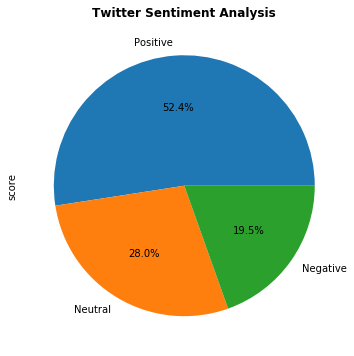

In [10]:
cleanTweet['score'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize =(7,6))
plt.title('Twitter Sentiment Analysis',  fontweight="bold")

In [11]:
cleanTweet.drop(cleanTweet[cleanTweet['score'] == 'Neutral'].index, inplace = True)

In [12]:
cleanTweet['scoremap']= cleanTweet.score.map({'Positive':1, 'Negative':0})

In [13]:
X = cleanTweet['clean_text']
y = cleanTweet['scoremap']

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [14]:
def N_gram_classifier(X_train, y_train, X_test, n_gram):
    countVect = CountVectorizer( analyzer = 'word', lowercase = True, ngram_range = n_gram)
    X_train = countVect.fit_transform(X_train)
    X_test = countVect.transform(X_test)
    
    clf = SGDClassifier(loss = "hinge", penalty = 'l2')
    clf.fit(X_train,y_train)
    
    prediction = clf.predict(X_test)
    
    return prediction

In [15]:
y_prediction = N_gram_classifier(X_train, y_train, X_test, (3,3))

In [16]:
accuracy_score(y_test, y_prediction)

0.9608843537414966